In [1]:
import torch
import helper_functions as h

## Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$ \boldsymbol \omega = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_d \end{bmatrix},\qquad b $
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
$,\qquad b \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,)}$ 

$ \boldsymbol{z} = \boldsymbol{\omega^T X}+b 
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(1,m)=(1,d)\times(d,m)} $
<br>
$ \boldsymbol{z} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \end{bmatrix}  $ 

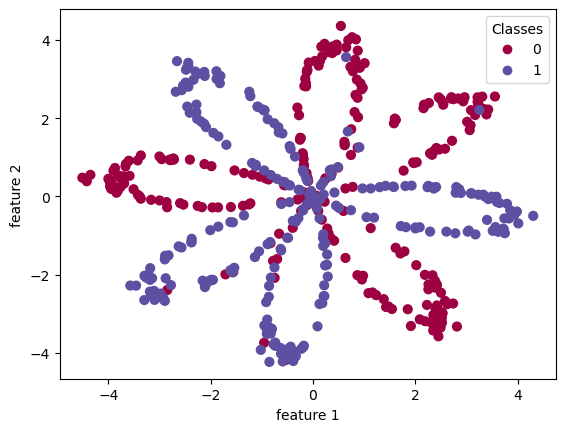

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=4)
h.plot_scatter(X_np, Y_np)

In [3]:
X = torch.tensor(X_np, dtype=torch.float32)   # shape=(2,500)=(d,m)
Y = torch.tensor(Y_np, dtype=torch.float32)   # shape=(1,500)=(1,m)

In [4]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
w = torch.zeros(X.shape[0], 1, requires_grad=True)     # shape=(d,1)=(2,1)
b = torch.zeros(1, requires_grad=True)                # shape=(1,)

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = torch.mm(w.T,X)+b    # shape(1,m) --> (1,d)X(d,m) float32
    Y_pred = torch.sigmoid(z)
    # cost = torch.nn.functional.binary_cross_entropy_with_logits(z, Y, reduction="mean")
    cost = torch.nn.functional.binary_cross_entropy(Y_pred, Y, reduction="mean")

    ## backward passs
    cost.backward()
    ## updata parameters
    w.data = w.data - learning_rate * w.grad.data
    b.data = b.data - learning_rate * b.grad.data
    ## zero the gradients before running the backward pass
    w.grad.data.zero_()
    b.grad.data.zero_()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32
        acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = torch.mm(w.T, X)+b    # shape(1,m) --> (1,d)X(d,m) float32
Y_pred = torch.sigmoid(z)                 # shape(1,m) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32

## Print train/test Errors
if print_cost:
    acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6901395320892334
Cost in epochs 21, 0.687431275844574
Cost in epochs 31, 0.6849924325942993
Cost in epochs 41, 0.6827957630157471
Cost in epochs 51, 0.6808168888092041
Cost in epochs 61, 0.6790336966514587
Cost in epochs 71, 0.6774263978004456
Cost in epochs 81, 0.6759771704673767
Cost in epochs 91, 0.6746701598167419
Cost in epochs 100, 0.673603355884552
train accuracy: 47.40000069141388 %


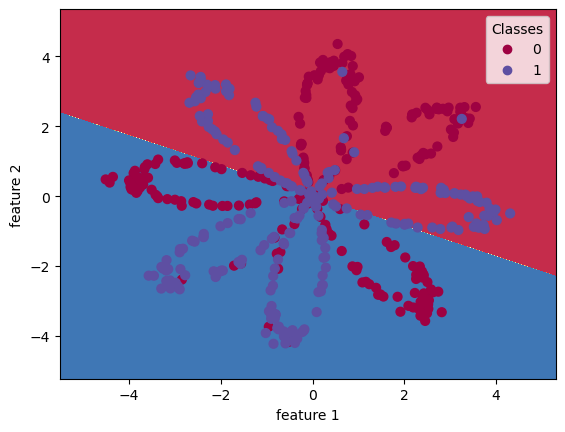

In [5]:
h.plot_decision_boundary(w.detach().numpy(), b.detach().numpy(), X.numpy(), Y.numpy())